# Biosignal Analytics 2022
## EEG seizure detection

- Lauri Orava, 516761, laorav@utu.fi
- Emilia Kalliokoski, 2100413, emamka@utu.fi

In [4]:
# Library imports
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy

from scipy import signal
from sklearn import preprocessing

from scipy.signal import freqz, butter, lfilter

In [5]:
# Create lists of raw data
PATH_ns = os.path.join(os.getcwd(), 'Data', 'nonseizure')
PATH_s = os.path.join(os.getcwd(), 'Data', 'seizure')

raw_data_ns = []
raw_data_s = []

for file in glob.glob((PATH_ns+"/*.csv")):
    data = pd.read_csv(file)
    raw_data_ns.append(data)

for file in glob.glob((PATH_s+"/*.csv")):
    data = pd.read_csv(file)
    raw_data_s.append(data)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

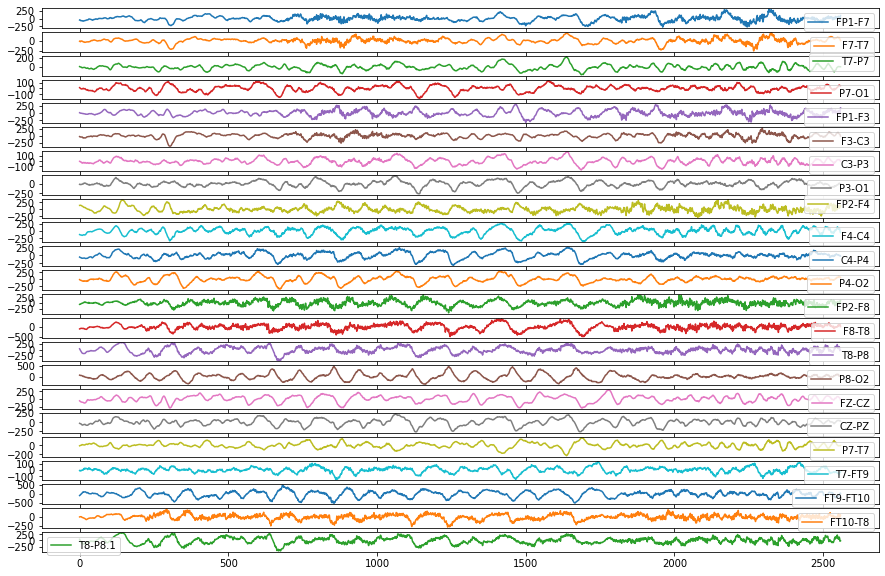

In [6]:
# Visualize data to better understand it
eeg_df = pd.read_csv('Data\seizure\sample_chb01_0.csv')
eeg_df.plot(subplots=True, figsize=(15,10))

In [86]:
def butter_bandpass_filter(lowcut, highcut, freq, order, data):
  sampling_rate = 0.5*freq
  b,a = butter(order, [lowcut/sampling_rate, highcut/sampling_rate], btype = 'band')
  y = lfilter(b,a,data)
  return y

s_filtered = []
for i in range (0, len(raw_data_s)):
  temp_df = raw_data_s[i]
  filtered = dict()
  for j in temp_df.columns:
    channel = temp_df[j].values
    filtered[j] = butter_bandpass_filter(0.5, 50, freq=256, order=4, data=channel)
  filtered_df = pd.DataFrame.from_dict(filtered)
  s_filtered.append(filtered_df)

ns_filtered = []
for i in range (0, len(raw_data_ns)):
  temp_df = raw_data_ns[i]
  filtered = dict()
  for j in temp_df.columns:
    channel = temp_df[j].values
    filtered[j] = butter_bandpass_filter(0.5, 50, freq=256, order=4, data=channel)
  filtered_df = pd.DataFrame.from_dict(filtered)
  ns_filtered.append(filtered_df)

In [7]:
# Extract means from unfiltered non-seizure data and seizure data

ns_mean = pd.DataFrame(columns=list(raw_data_ns[0].columns + ' mean'))
for i in range (0, len(raw_data_ns)):
    temp_df = raw_data_ns[i]
    means = []
    for j in range(0, len(temp_df.columns)):
        means.append(temp_df.iloc[:, j].mean())
    ns_mean.loc[i] = means

s_mean = pd.DataFrame(columns=list(raw_data_s[0].columns + ' mean'))
for i in range (0, len(raw_data_s)):
    temp_df = raw_data_s[i]
    means = []
    for j in range(0, len(temp_df.columns)):
        means.append(temp_df.iloc[:, j].mean())
    s_mean.loc[i] = means

In [8]:
# Extract standard deviations from unfiltered non-seizure data and seizure data

ns_stds = pd.DataFrame(columns=list(raw_data_ns[0].columns + ' std'))
for i in range(0, len(raw_data_ns)):
    temp_df = raw_data_ns[i]
    stds = []
    for j in range(0, len(temp_df.columns)):
        stds.append(temp_df.iloc[:, j].std())
    ns_stds.loc[i] = stds

s_stds = pd.DataFrame(columns=list(raw_data_s[0].columns + ' std'))
for i in range(0, len(raw_data_s)):
    temp_df = raw_data_s[i]
    stds = []
    for j in range(0, len(temp_df.columns)):
        stds.append(temp_df.iloc[:, j].std())
    s_stds.loc[i] = stds

In [9]:
# Extract medians from unfiltered non-seizure data and seizure data

ns_medians = pd.DataFrame(columns=list(raw_data_ns[0].columns + ' md'))
for i in range(0, len(raw_data_ns)):
    temp_df = raw_data_ns[i]
    medians = []
    for j in range(0, len(temp_df.columns)):
        medians.append(temp_df.iloc[:, j].median())
    ns_medians.loc[i] = medians

s_medians = pd.DataFrame(columns=list(raw_data_s[0].columns + ' md'))
for i in range(0, len(raw_data_s)):
    temp_df = raw_data_s[i]
    medians = []
    for j in range(0, len(temp_df.columns)):
        medians.append(temp_df.iloc[:, j].median())
    s_medians.loc[i] = medians

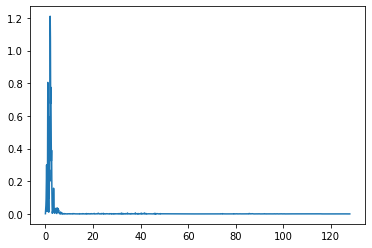

2.0


In [10]:
norm = preprocessing.scale(raw_data_s[3])

PSD_freqs , PSD = signal.welch(norm[:, 0], fs=256, nperseg = 10*256)

plt.plot(PSD_freqs, PSD)
plt.show()

dominant_freq = PSD_freqs[PSD.tolist().index(max(PSD))]
print(dominant_freq)